In [1]:
%load_ext autoreload
%autoreload 2
import sys
# instead of creating a package using setup.py or building from a docker/singularity file,
# import the sister directory of src code to be called on in notebook.
# This keeps the notebook free from code to only hold visualizations and is easier to test
# It also helps keep the state of variables clean such that cells aren't run out of order with a mysterious state
sys.path.append("..")

In [2]:
from src import most_recent_mesonet_data
from src import most_recent_mesonet_time
from src import landtype_describe
from src.plotting_scripts import landtype
import os
import pandas as pd

Matplotlib created a temporary config/cache directory at /tmp/tmp.MhyFRk1Q9s/matplotlib-cftx311_ because the default path (/home/aevans/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [7]:
# This will return the most recent data avail on mesonet 
# this is my file path
ny_mesonet_data_path = '/home/aevans/nysm/archive/nysm/netcdf/proc'
ok_mesonet_data_path = '/home/aevans/landtype/geoinfo.csv'


In [4]:
# create a dataframe of mesonet data ny
ny_df = most_recent_mesonet_data.current_time_mesonet_df(ny_mesonet_data_path)
ny_df = most_recent_mesonet_time.most_recent_time(ny_df, ny_mesonet_data_path)
ny_df

,index,station,time_5M,lat,lon,elev,tair,ta9m,tslo,relh,...,ts05,ts25,ts50,sm05,sm25,sm50,frozen05,frozen25,frozen50,snow_depth
244,244,ADDI,2023-01-25 20:20:00,42.040359,-77.237259,507.614014,-0.549379,-0.417198,-0.530010,87.838348,...,1.4,2.400000,3.10,0.580,0.440,0.429,0.0,0.0,0.0,0.127709
532,532,ANDE,2023-01-25 20:20:00,42.182270,-74.801392,518.281982,-2.246521,-2.415372,-2.312704,94.607658,...,2.3,2.800000,3.48,0.283,0.175,0.168,0.0,0.0,0.0,0.126281
820,820,BATA,2023-01-25 20:20:00,43.019939,-78.135658,276.119995,-1.584557,-1.551552,-1.768250,95.871712,...,1.3,2.200000,3.30,0.312,0.260,0.279,0.0,0.0,0.0,0.091313
1108,1108,BEAC,2023-01-25 20:20:00,41.528751,-73.945267,90.159798,0.378058,0.033470,0.235776,96.958572,...,3.1,4.099999,4.30,0.380,0.411,0.400,0.0,0.0,0.0,0.005783
1396,1396,BELD,2023-01-25 20:20:00,42.223221,-75.668518,470.369995,-2.213630,-2.200496,-2.173227,89.609337,...,2.1,2.300000,2.90,0.425,0.476,0.402,0.0,0.0,0.0,0.216537
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35092,35092,WFMB,2023-01-25 20:20:00,44.393234,-73.858826,614.598999,-6.762671,-7.011311,-6.771421,94.587502,...,0.6,1.400000,2.10,0.251,0.216,0.230,0.0,0.0,0.0,0.218416
35380,35380,WGAT,2023-01-25 20:20:00,43.532410,-75.158600,442.966003,-3.391066,-3.457011,-3.355189,93.531593,...,0.2,0.600000,1.30,0.149,0.271,0.091,0.0,0.0,0.0,0.193125
35668,35668,WHIT,2023-01-25 20:20:00,43.485073,-73.423073,36.563801,-2.806006,-3.038294,-2.829500,90.498894,...,0.2,1.200000,2.60,0.432,0.514,0.501,0.0,0.0,0.0,0.165651
35956,35956,WOLC,2023-01-25 20:20:00,43.228680,-76.842613,121.219002,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
ny_df_lons = ny_df['lon'].to_list()
ny_df_lats = ny_df['lat'].to_list()

In [9]:
# create a dataframe of mesonet data ok
ok_df = pd.read_csv(ok_mesonet_data_path)
ok_df

,stnm,stid,name,city,rang,cdir,cnty,nlat,elon,elev,...,A75,N75,BULK75,GRAV75,SAND75,SILT75,CLAY75,TEXT75,datc,datd
0,110,ACME,Acme,Rush Springs,4.0,WNW,Grady,34.80833,-98.02325,397,...,0.178,1.32,1.68,0.0,53.2,24.1,22.8,Sandy Clay Loam,19940101,20991231
1,1,ADAX,Ada,Ada,2.0,NNE,Pontotoc,34.79851,-96.66909,295,...,0.053,1.20,1.86,0.0,43.6,26.6,29.8,Clay Loam,19940101,20991231
2,2,ALTU,Altus,Altus,3.0,S,Jackson,34.58722,-99.33808,416,...,0.059,1.16,1.73,0.0,15.0,40.9,44.1,Silty Clay,19940101,20991231
3,116,ALV2,Alva,Alva,7.2,SSW,Woods,36.70823,-98.70974,439,...,-999.000,-999.00,-999.00,-999.0,-999.0,-999.0,-999.0,-999,19981217,20991231
4,3,ALVA,Alva,Alva,2.0,S,Woods,36.77970,-98.67170,450,...,-999.000,-999.00,-999.00,-999.0,-999.0,-999.0,-999.0,-999,19940101,19981216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,105,WILB,Wilburton,Wilburton,2.0,SW,Latimer,34.90092,-95.34805,199,...,0.189,1.21,1.37,0.0,8.7,27.4,63.9,Clay,19940101,20991231
140,106,WIST,Wister,Wister,3.0,ENE,LeFlore,34.98426,-94.68778,143,...,0.096,1.16,1.44,0.0,4.4,24.9,70.8,Clay,19940101,20991231
141,107,WOOD,Woodward,Woodward,2.0,WSW,Woodward,36.42329,-99.41682,625,...,0.270,1.47,1.33,0.0,42.6,31.9,25.5,Loam,19940101,20991231
142,108,WYNO,Wynona,Wynona,2.0,S,Osage,36.51806,-96.34222,269,...,0.079,1.23,1.69,0.0,9.8,37.2,53.0,Clay,19940101,20991231


In [10]:
ok_df_lons = ok_df['elon'].to_list()
ok_df_lats = ok_df['nlat'].to_list()

develop way to add modes

In [11]:
csv_path = '/home/aevans/landtype/data/extract_csv_nysm/'

In [12]:
# # these are my csvs for the landtype buffers in the nysm 
# all_files = os.listdir(csv_path)    
# csv_files = list(filter(lambda f: f.endswith('.csv'), all_files))
# csv_files

In [13]:
station_list_ny = ny_df['station'].to_list()
station_list_ny

['ADDI',
 'ANDE',
 'BATA',
 'BEAC',
 'BELD',
 'BELL',
 'BELM',
 'BERK',
 'BING',
 'BKLN',
 'BRAN',
 'BREW',
 'BROC',
 'BRON',
 'BROO',
 'BSPA',
 'BUFF',
 'BURD',
 'BURT',
 'CAMD',
 'CAPE',
 'CHAZ',
 'CHES',
 'CINC',
 'CLAR',
 'CLIF',
 'CLYM',
 'COBL',
 'COHO',
 'COLD',
 'COPA',
 'COPE',
 'CROG',
 'CSQR',
 'DELE',
 'DEPO',
 'DOVE',
 'DUAN',
 'EAUR',
 'EDIN',
 'EDWA',
 'ELDR',
 'ELLE',
 'ELMI',
 'ESSX',
 'FAYE',
 'FRED',
 'GABR',
 'GFAL',
 'GFLD',
 'GROT',
 'GROV',
 'HAMM',
 'HARP',
 'HARR',
 'HART',
 'HERK',
 'HFAL',
 'ILAK',
 'JOHN',
 'JORD',
 'KIND',
 'LAUR',
 'LOUI',
 'MALO',
 'MANH',
 'MEDI',
 'MEDU',
 'MORR',
 'NBRA',
 'NEWC',
 'NHUD',
 'OLDF',
 'OLEA',
 'ONTA',
 'OPPE',
 'OSCE',
 'OSWE',
 'OTIS',
 'OWEG',
 'PENN',
 'PHIL',
 'PISE',
 'POTS',
 'QUEE',
 'RAND',
 'RAQU',
 'REDF',
 'REDH',
 'ROXB',
 'RUSH',
 'SARA',
 'SBRI',
 'SCHA',
 'SCHO',
 'SCHU',
 'SCIP',
 'SHER',
 'SOME',
 'SOUT',
 'SPRA',
 'SPRI',
 'STAT',
 'STEP',
 'STON',
 'SUFF',
 'TANN',
 'TICO',
 'TULL',
 'TUPP',
 'TYRO',
 

In [14]:
# first mode
count1_list = [263326]
class_name1_list = ['Deciduous Forest']
value1_list = [41]

# second mode
count2_list = [191441]
class_name2_list = ['Mixed Forest']
value2_list = [43]

#third mode
count3_list = [190997]
class_name3_list = ['Pasture/Hay']
value3_list = [81]

In [15]:
# for i in range(2,127):
#     df = pd.read_csv(f'/home/aevans/landtype/data/extract_csv_nysm/{i}_csv.csv')
#     the_mode = df.sort_values(by=['Count'], ascending=False) 
#     #first mode
#     first_mode = the_mode.iloc[0]
#     count1 = first_mode['Count'].tolist()
#     class_name1 = first_mode['ClassName']
#     value1 = first_mode['Value'].tolist()
#     count1_list.append(count1)
#     class_name1_list.append(class_name1)
#     value1_list.append(value1)
#     #second mode
#     second_mode = the_mode.iloc[1]
#     count2 = second_mode['Count'].tolist()
#     class_name2 = second_mode['ClassName']
#     value2 = second_mode['Value'].tolist()
#     count2_list.append(count2)
#     class_name2_list.append(class_name2)
#     value2_list.append(value2)
#     #third mode
#     third_mode = the_mode.iloc[2]
#     count3 = third_mode['Count'].tolist()
#     class_name3 = third_mode['ClassName']
#     value3 = third_mode['Value'].tolist()
#     count3_list.append(count3)
#     class_name3_list.append(class_name3)
#     value3_list.append(value3)

In [16]:
# avg_lulc_ny_15_df = pd.DataFrame()
# avg_lulc_ny_15_df['station'] = station_list_ny
# #first mode
# avg_lulc_ny_15_df['firstmode_count'] = count1_list
# avg_lulc_ny_15_df['firstmode_class'] = class_name1_list
# avg_lulc_ny_15_df['firstmode_val'] = value1_list
# # second mode
# avg_lulc_ny_15_df['secondmode_count'] = count2_list
# avg_lulc_ny_15_df['secondmode_class'] = class_name2_list
# avg_lulc_ny_15_df['secondmode_val'] = value2_list
# #third mode
# avg_lulc_ny_15_df['thirdmode_count'] = count3_list
# avg_lulc_ny_15_df['thirdmode_class'] = class_name3_list
# avg_lulc_ny_15_df['thirdmode_val'] = value3_list
# avg_lulc_ny_15_df.to_csv('/home/aevans/landtype/data/avg_lulc_ny_15.csv')

# Oklahoma

In [17]:
csv_path = '/home/aevans/landtype/data/extract_csv_oksm/'

In [18]:
# # these are my csvs for the landtype buffers in the nysm 
# all_files = os.listdir(csv_path)    
# csv_files = list(filter(lambda f: f.endswith('.csv'), all_files))
# csv_files

In [19]:
station_list_ok = ok_df['stid'].to_list()
len(station_list_ok)

144

In [20]:
# first mode
count1_list_ok = [543545]
class_name1_list_ok = ['Grasslands/Herbaceous']
value1_list_ok = [71]

# second mode
count2_list_ok = [124269]
class_name2_list_ok = ['Deciduous Forest']
value2_list_ok = [41]

#third mode
count3_list_ok = [59662]
class_name3_list_ok = ['Cultivated Crops']
value3_list_ok = [82]

In [21]:
# for i in range(2,145):
#     df = pd.read_csv(f'/home/aevans/landtype/data/extract_csv_oksm/{i}_csv.csv')
#     the_mode = df.sort_values(by=['Count'], ascending=False) 
#     #first mode
#     first_mode = the_mode.iloc[0]
#     count1 = first_mode['Count'].tolist()
#     class_name1 = first_mode['ClassName']
#     value1 = first_mode['Value'].tolist()
#     count1_list_ok.append(count1)
#     class_name1_list_ok.append(class_name1)
#     value1_list_ok.append(value1)
#     #second mode
#     second_mode = the_mode.iloc[1]
#     count2 = second_mode['Count'].tolist()
#     class_name2 = second_mode['ClassName']
#     value2 = second_mode['Value'].tolist()
#     count2_list_ok.append(count2)
#     class_name2_list_ok.append(class_name2)
#     value2_list_ok.append(value2)
#     #third mode
#     third_mode = the_mode.iloc[2]
#     count3 = third_mode['Count'].tolist()
#     class_name3 = third_mode['ClassName']
#     value3 = third_mode['Value'].tolist()
#     count3_list_ok.append(count3)
#     class_name3_list_ok.append(class_name3)
#     value3_list_ok.append(value3)

In [22]:
# avg_lulc_ok_15_df = pd.DataFrame()
# avg_lulc_ok_15_df['station'] = station_list_ok
# #first mode
# avg_lulc_ok_15_df['firstmode_count'] = count1_list_ok
# avg_lulc_ok_15_df['firstmode_class'] = class_name1_list_ok
# avg_lulc_ok_15_df['firstmode_val'] = value1_list_ok
# # second mode
# avg_lulc_ok_15_df['secondmode_count'] = count2_list_ok
# avg_lulc_ok_15_df['secondmode_class'] = class_name2_list_ok
# avg_lulc_ok_15_df['secondmode_val'] = value2_list_ok
# #third mode
# avg_lulc_ok_15_df['thirdmode_count'] = count3_list_ok
# avg_lulc_ok_15_df['thirdmode_class'] = class_name3_list_ok
# avg_lulc_ok_15_df['thirdmode_val'] = value3_list_ok
# avg_lulc_ok_15_df.to_csv('/home/aevans/landtype/data/avg_lulc_ok_15.csv')

In [23]:
avg_lulc_ok_15_df = pd.read_csv(f'/home/aevans/landtype/data/buffer_15_km/avg_lulc_ok_15.csv')

In [24]:
avg_lulc_ny_15_df = pd.read_csv(f'/home/aevans/landtype/data/buffer_15_km/avg_lulc_ny_15.csv')

In [25]:
import matplotlib.pyplot as plt 
import pandas as pd
import cartopy.crs as crs
import cartopy.feature as cfeature
import numpy as np
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
from matplotlib import colors

LEG_STR = ['No Data','Open Water','Perennial Ice/Snow',
    'Developed, Open Space','Developed, Low Intensity', 'Developed, Medium Intensity','Developed High Intensity',
    'Barren Land (Rock/Sand/Clay)',
    'Deciduous Forest','Evergreen Forest','Mixed Forest', 'Forest/Shrub',
    'Dwarf Scrub','Shrub/Scrub',
    'Grassland/Herbaceous','Sedge/Herbaceous','Lichens','Moss',
    'Pasture/Hay','Cultivated Crops',
    'Woody Wetlands','Emergent Herbaceous Wetlands']
COLORS = ['black', 'blue', 'white', 'coral', 'pink', 'red', 'magenta', 'gray', 'lime', 'forestgreen', 'green', 'olive', 'brown', 'slategray', 'darkorchid','plum', 'indigo', 'purple', 'yellow', 'gold', 'orange', 'cyan']


def create_cmap()->ListedColormap:
    """
    this creates the landtype colormap

    Returns:
        cmap (ListedColorMap)
    """

    legend = np.array([0,11,12,21,22,23,24,31,41,42,43,45,51,52,71,72,73,74,81,82,90,95])


    colordict={}
    for x,_ in enumerate(COLORS):
        colordict.update({legend[x] : COLORS[x]})
    return ListedColormap(colordict)


def landtype(df:pd.DataFrame)->None: 
    """
    this plots the landtype for a specified region determined by the imported dataframe

    Args: 
        df (pd.DataFrame): landtype, lat, lon
    """
    cmap = create_cmap()

    projPC = crs.PlateCarree()
    latN = df['lat'].max()
    latS = df['lat'].min()
    lonW = df['lon'].max()
    lonE = df['lon'].min()
    cLat = (latN + latS) / 2
    cLon = (lonW + lonE) / 2
    projLcc = crs.LambertConformal(central_longitude=cLon, central_latitude=cLat)

    fig, ax = plt.subplots(figsize=(12,9), subplot_kw={'projection': crs.PlateCarree()})
    ax.legend()
    ax.set_extent([lonW, lonE, latS, latN], crs=projPC)
    ax.add_feature(cfeature.LAND)
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.BORDERS, linestyle='--');
    ax.add_feature(cfeature.LAKES, alpha=0.5)
    ax.add_feature(cfeature.STATES)
    ax.xticklabels_top = False
    ax.ylabels_right = False
    ax.gridlines(crs=crs.PlateCarree(), draw_labels=True,
                    linewidth=2, color='black', alpha=0.5, linestyle='--')

    plt.scatter(df['lon'], df['lat'], c=df['color'], cmap = cmap, transform=crs.PlateCarree(), zorder=5)

    #legend 
    patches = []
    for i,_ in enumerate(COLORS):
            patch = mpatches.Patch(color=COLORS[i], label=LEG_STR[i])
            patches.append(patch)
            


    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0,handles=patches)

In [26]:
colors = ['black', 'blue', 'white', 'coral', 'pink', 'red', 'magenta', 'gray', 'lime', 'forestgreen', 'green', 'olive', 'brown', 'slategray', 'darkorchid','plum', 'indigo', 'purple', 'yellow', 'gold', 'orange', 'cyan']
legend = np.array([0,11,12,21,22,23,24,31,41,42,43,45,51,52,71,72,73,74,81,82,90,95])
leg_str = ['No Data','Open Water','Perennial Ice/Snow',
'Developed, Open Space','Developed, Low Intensity', 'Developed, Medium Intensity','Developed High Intensity',
'Barren Land (Rock/Sand/Clay)',
'Deciduous Forest','Evergreen Forest','Mixed Forest', 'Forest/Shrub',
'Dwarf Scrub','Shrub/Scrub',
'Grassland/Herbaceous','Sedge/Herbaceous','Lichens','Moss',
'Pasture/Hay','Cultivated Crops',
'Woody Wetlands','Emergent Herbaceous Wetlands']

descripdict={}
colordict={}

for x,_ in enumerate(colors):
    descripdict.update({legend[x] : leg_str[x]})
    colordict.update({legend[x] : colors[x]})


avg_lulc_ny_15_df['color'] = avg_lulc_ny_15_df['firstmode_val'].map(colordict)
avg_lulc_ny_15_df['lon'] = ny_df_lons
avg_lulc_ny_15_df['lat'] = ny_df_lats

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


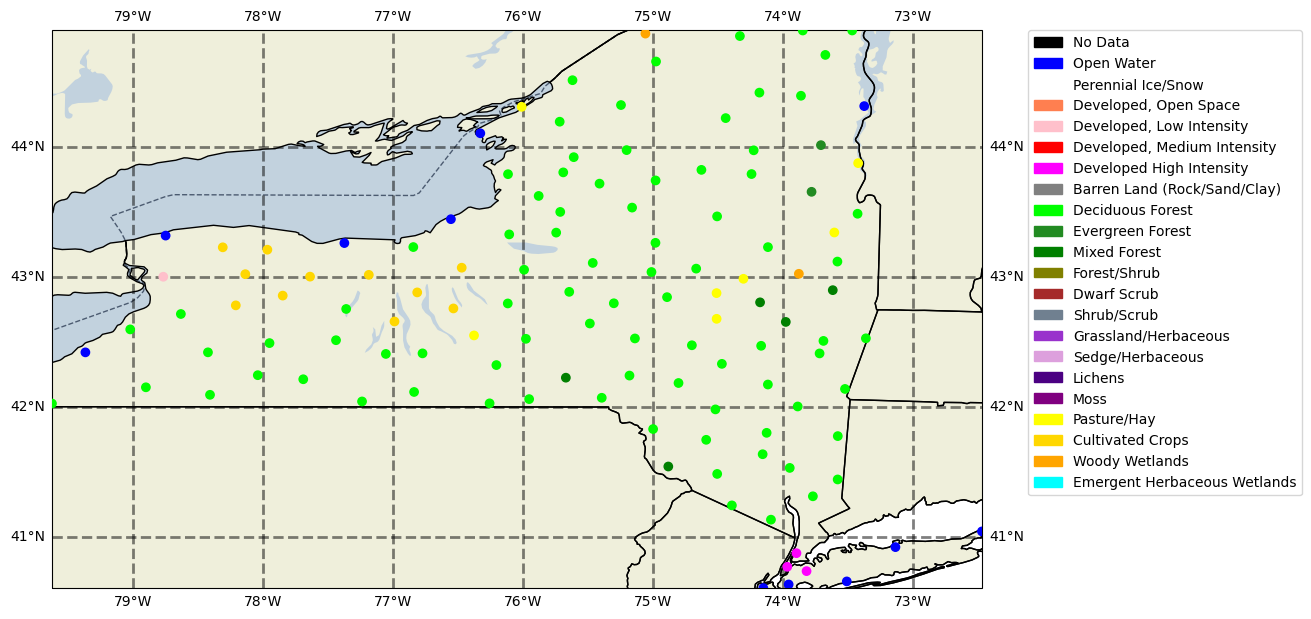

In [27]:
landtype(avg_lulc_ny_15_df)

In [28]:
colors = ['black', 'blue', 'white', 'coral', 'pink', 'red', 'magenta', 'gray', 'lime', 'forestgreen', 'green', 'olive', 'brown', 'slategray', 'darkorchid','plum', 'indigo', 'purple', 'yellow', 'gold', 'orange', 'cyan']
legend = np.array([0,11,12,21,22,23,24,31,41,42,43,45,51,52,71,72,73,74,81,82,90,95])
leg_str = ['No Data','Open Water','Perennial Ice/Snow',
'Developed, Open Space','Developed, Low Intensity', 'Developed, Medium Intensity','Developed High Intensity',
'Barren Land (Rock/Sand/Clay)',
'Deciduous Forest','Evergreen Forest','Mixed Forest', 'Forest/Shrub',
'Dwarf Scrub','Shrub/Scrub',
'Grassland/Herbaceous','Sedge/Herbaceous','Lichens','Moss',
'Pasture/Hay','Cultivated Crops',
'Woody Wetlands','Emergent Herbaceous Wetlands']

descripdict={}
colordict={}

for x,_ in enumerate(colors):
    descripdict.update({legend[x] : leg_str[x]})
    colordict.update({legend[x] : colors[x]})


avg_lulc_ok_15_df['color'] = avg_lulc_ok_15_df['firstmode_val'].map(colordict)
avg_lulc_ok_15_df['lon'] = ok_df_lons
avg_lulc_ok_15_df['lat'] = ok_df_lats

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


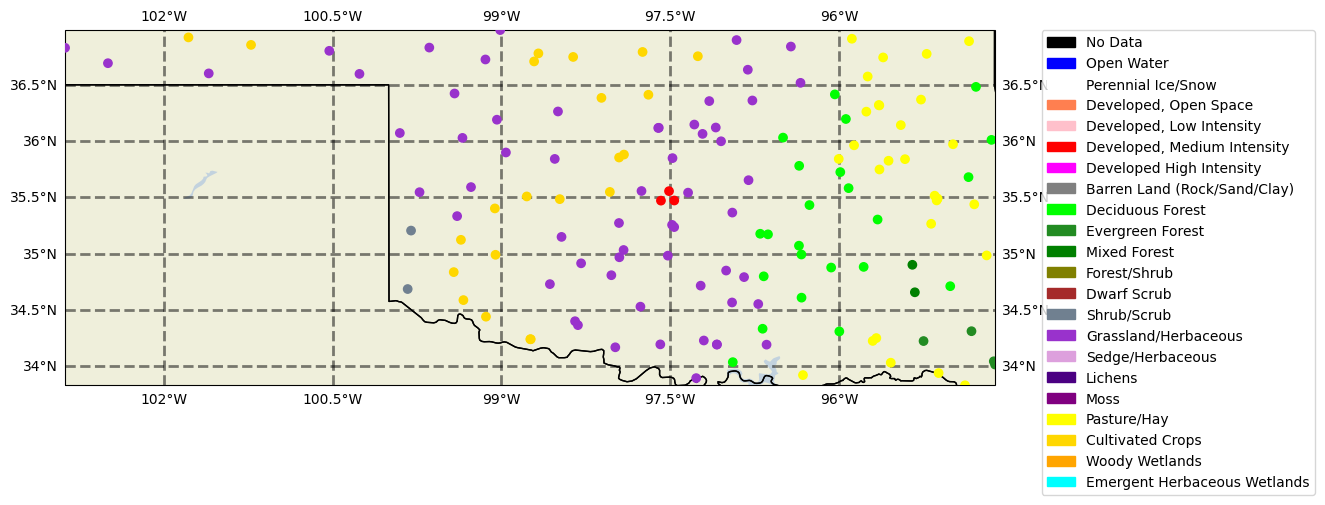

In [29]:
landtype(avg_lulc_ok_15_df)

In [38]:
def format_df(df):
    colors = ['black', 'blue', 'white', 'coral', 'pink', 'red', 'magenta', 'gray', 'lime', 'forestgreen', 'green', 'olive', 'brown', 'slategray', 'darkorchid','plum', 'indigo', 'purple', 'yellow', 'gold', 'orange', 'cyan']
    legend = np.array([0,11,12,21,22,23,24,31,41,42,43,45,51,52,71,72,73,74,81,82,90,95])
    leg_str = ['No Data','Open Water','Perennial Ice/Snow',
    'Developed, Open Space','Developed, Low Intensity', 'Developed, Medium Intensity','Developed High Intensity',
    'Barren Land (Rock/Sand/Clay)',
    'Deciduous Forest','Evergreen Forest','Mixed Forest', 'Forest/Shrub',
    'Dwarf Scrub','Shrub/Scrub',
    'Grassland/Herbaceous','Sedge/Herbaceous','Lichens','Moss',
    'Pasture/Hay','Cultivated Crops',
    'Woody Wetlands','Emergent Herbaceous Wetlands']

    descripdict={}
    colordict={}

    for x,_ in enumerate(colors):
        descripdict.update({legend[x] : leg_str[x]})
        colordict.update({legend[x] : colors[x]})


    df['color'] = df['firstmode_val'].map(colordict)

    total = df['firstmode_count'] + df['secondmode_count'] + df['thirdmode_count']
    df['divide'] = (df['firstmode_count'] / total) * 100

In [39]:
avg_lulc_ok_15_df

,Unnamed: 0,station,firstmode_count,firstmode_class,firstmode_val,secondmode_count,secondmode_class,secondmode_val,thirdmode_count,thirdmode_class,thirdmode_val,color,lon,lat,divide
0,0,ACME,543545.0,Grasslands/Herbaceous,71,124269.0,Deciduous Forest,41,59662.0,Cultivated Crops,82,darkorchid,-98.02325,34.80833,74.716554
1,1,ADAX,330843.0,Deciduous Forest,41,257569.0,Grassland/Herbaceous,71,94505.0,Pasture/Hay,81,lime,-96.66909,34.79851,48.445565
2,2,ALTU,601502.0,Cultivated Crops,82,69872.0,Shrub/Scrub,52,32169.0,Developed Open Space,21,gold,-99.33808,34.58722,85.496125
3,3,ALV2,383468.0,Cultivated Crops,82,348586.0,Grassland/Herbaceous,71,18253.0,Developed Open Space,21,gold,-98.70974,36.70823,51.108146
4,4,ALVA,454639.0,Cultivated Crops,82,277357.0,Grassland/Herbaceous,71,19465.0,Developed Open Space,21,gold,-98.67170,36.77970,60.500678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,139,WILB,198148.0,Mixed Forest,43,179390.0,Deciduous Forest,41,156671.0,Pasture/Hay,81,green,-95.34805,34.90092,37.091850
140,140,WIST,262320.0,Pasture/Hay,81,152875.0,Deciduous Forest,41,132758.0,Mixed Forest,43,yellow,-94.68778,34.98426,47.872719
141,141,WOOD,615793.0,Grassland/Herbaceous,71,70185.0,Cultivated Crops,82,22456.0,Evergreen Forest,42,darkorchid,-99.41682,36.42329,86.923129
142,142,WYNO,409717.0,Grassland/Herbaceous,71,253018.0,Deciduous Forest,41,47023.0,Pasture/Hay,81,darkorchid,-96.34222,36.51806,57.726295


In [40]:
avg_lulc_ny_15_df

,Unnamed: 0,station,firstmode_count,firstmode_class,firstmode_val,secondmode_count,secondmode_class,secondmode_val,thirdmode_count,thirdmode_class,thirdmode_val,color,lon,lat,divide
0,0,ADDI,263326.0,Deciduous Forest,41,191441.0,Mixed Forest,43,190997.0,Pasture/Hay,81,lime,-77.237259,42.040359,40.777436
1,1,ANDE,485835.0,Deciduous Forest,41,110354.0,Mixed Forest,43,81827.0,Pasture/Hay,81,lime,-74.801392,42.182270,71.655389
2,2,BATA,388471.0,Cultivated Crops,82,135554.0,Woody Wetlands,90,79666.0,Deciduous Forest,41,gold,-78.135658,43.019939,64.349311
3,3,BEAC,350943.0,Deciduous Forest,41,84333.0,Developed Open Space,21,74030.0,Developed Low Intensity,22,lime,-73.945267,41.528751,68.906119
4,4,BELD,244811.0,Mixed Forest,43,226581.0,Deciduous Forest,41,161238.0,Pasture/Hay,81,green,-75.668518,42.223221,38.697343
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,121,WFMB,280926.0,Deciduous Forest,41,270572.0,Evergreen Forest,42,115650.0,Mixed Forest,43,lime,-73.858826,44.393234,42.108498
122,122,WGAT,399301.0,Deciduous Forest,41,130693.0,Evergreen Forest,42,112341.0,Woody Wetlands,90,lime,-75.158600,43.532410,62.163980
123,123,WHIT,260735.0,Deciduous Forest,41,164503.0,Evergreen Forest,42,132882.0,Pasture/Hay,81,lime,-73.423073,43.485073,46.716656
124,124,WOLC,200389.0,Deciduous Forest,41,179726.0,Cultivated Crops,82,162843.0,Open Water,11,lime,-76.842613,43.228680,36.906906


In [31]:
avg_ok = format_df(avg_lulc_ok_15_df)
avg_ny = format_df(avg_lulc_ny_15_df)

In [34]:
avg_ok

In [44]:
def pluarlity_plot(df):

    colors = ['black', 'blue', 'white', 'coral', 'pink', 'red', 'magenta', 'gray', 'lime', 'forestgreen', 'green', 'olive', 'brown', 'slategray', 'darkorchid','plum', 'indigo', 'purple', 'yellow', 'gold', 'orange', 'cyan']
    legend = np.array([0,11,12,21,22,23,24,31,41,42,43,45,51,52,71,72,73,74,81,82,90,95])
    leg_str = ['No Data','Open Water','Perennial Ice/Snow',
    'Developed, Open Space','Developed, Low Intensity', 'Developed, Medium Intensity','Developed High Intensity',
    'Barren Land (Rock/Sand/Clay)',
    'Deciduous Forest','Evergreen Forest','Mixed Forest', 'Forest/Shrub',
    'Dwarf Scrub','Shrub/Scrub',
    'Grassland/Herbaceous','Sedge/Herbaceous','Lichens','Moss',
    'Pasture/Hay','Cultivated Crops',
    'Woody Wetlands','Emergent Herbaceous Wetlands']
    
              #legend 
    patches = []
    for i,_ in enumerate(colors):
            patch = mpatches.Patch(color=colors[i], label=leg_str[i])
            patches.append(patch)

    fig, ax = plt.subplots()
    df.plot.scatter(x='lon',
                                        y='lat',
                                        c='color',
                                        s='divide',
                                        marker = 'o',
                                        figsize=(9,6),
                                        ax = ax
                                        )
    ax.set_title('Mesonet Site Plurality by Landtype', size=16)
    ax.set_xlabel('Longitude',size=14)
    ax.set_ylabel('Latitude',size=14)
    ax.tick_params(axis='x', labelsize=12)
    ax.tick_params(axis='y', labelsize=12)
    ax.grid()
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0,handles=patches)

In [51]:
def percent_plot(df):
    colors = ['black', 'blue', 'white', 'coral', 'pink', 'red', 'magenta', 'gray', 'lime', 'forestgreen', 'green', 'olive', 'brown', 'slategray', 'darkorchid','plum', 'indigo', 'purple', 'yellow', 'gold', 'orange', 'cyan']
    legend = np.array([0,11,12,21,22,23,24,31,41,42,43,45,51,52,71,72,73,74,81,82,90,95])
    leg_str = ['No Data','Open Water','Perennial Ice/Snow',
    'Developed, Open Space','Developed, Low Intensity', 'Developed, Medium Intensity','Developed High Intensity',
    'Barren Land (Rock/Sand/Clay)',
    'Deciduous Forest','Evergreen Forest','Mixed Forest', 'Forest/Shrub',
    'Dwarf Scrub','Shrub/Scrub',
    'Grassland/Herbaceous','Sedge/Herbaceous','Lichens','Moss',
    'Pasture/Hay','Cultivated Crops',
    'Woody Wetlands','Emergent Herbaceous Wetlands']

                #legend 
    patches = []
    for i,_ in enumerate(colors):
            patch = mpatches.Patch(color=colors[i], label=leg_str[i])
            patches.append(patch)
        
    fig, ax = plt.subplots(figsize=(20,10))
    ax.scatter(df['station'], df['divide'], c=df['color'], s=50)
    for n in df.iterrows():
        ax.annotate(n[1]['station'], (n[1]['station'], n[1]['divide']), fontsize=15)
    ax.grid()
    ax.set_ylabel('Percent of Total', size=20)
    ax.tick_params(labelbottom = False, bottom = False)
    ax.legend(bbox_to_anchor=(1.05, 1), loc='center left', borderaxespad=0,handles=patches)

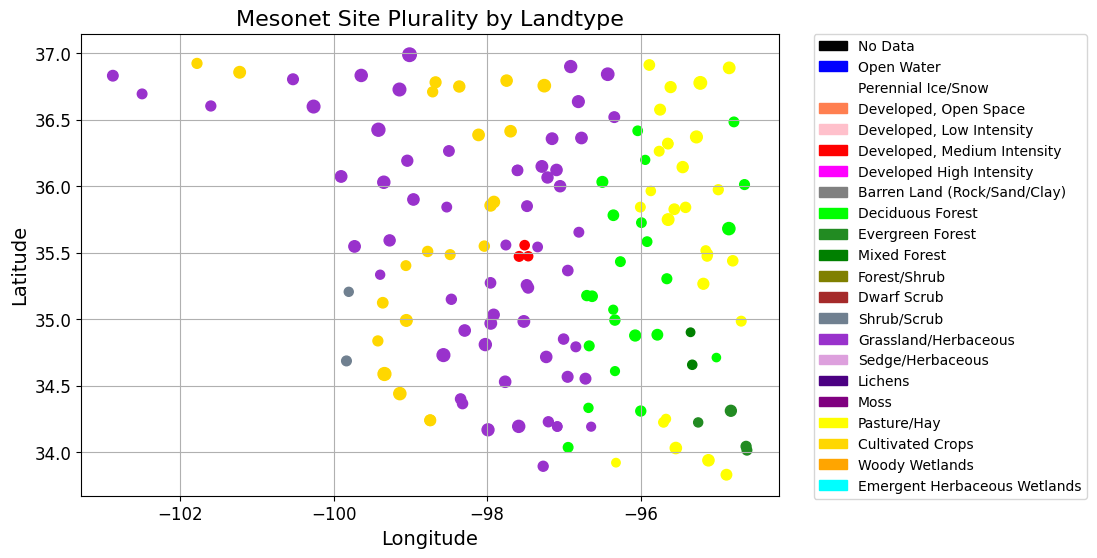

In [45]:
pluarlity_plot(avg_lulc_ok_15_df)

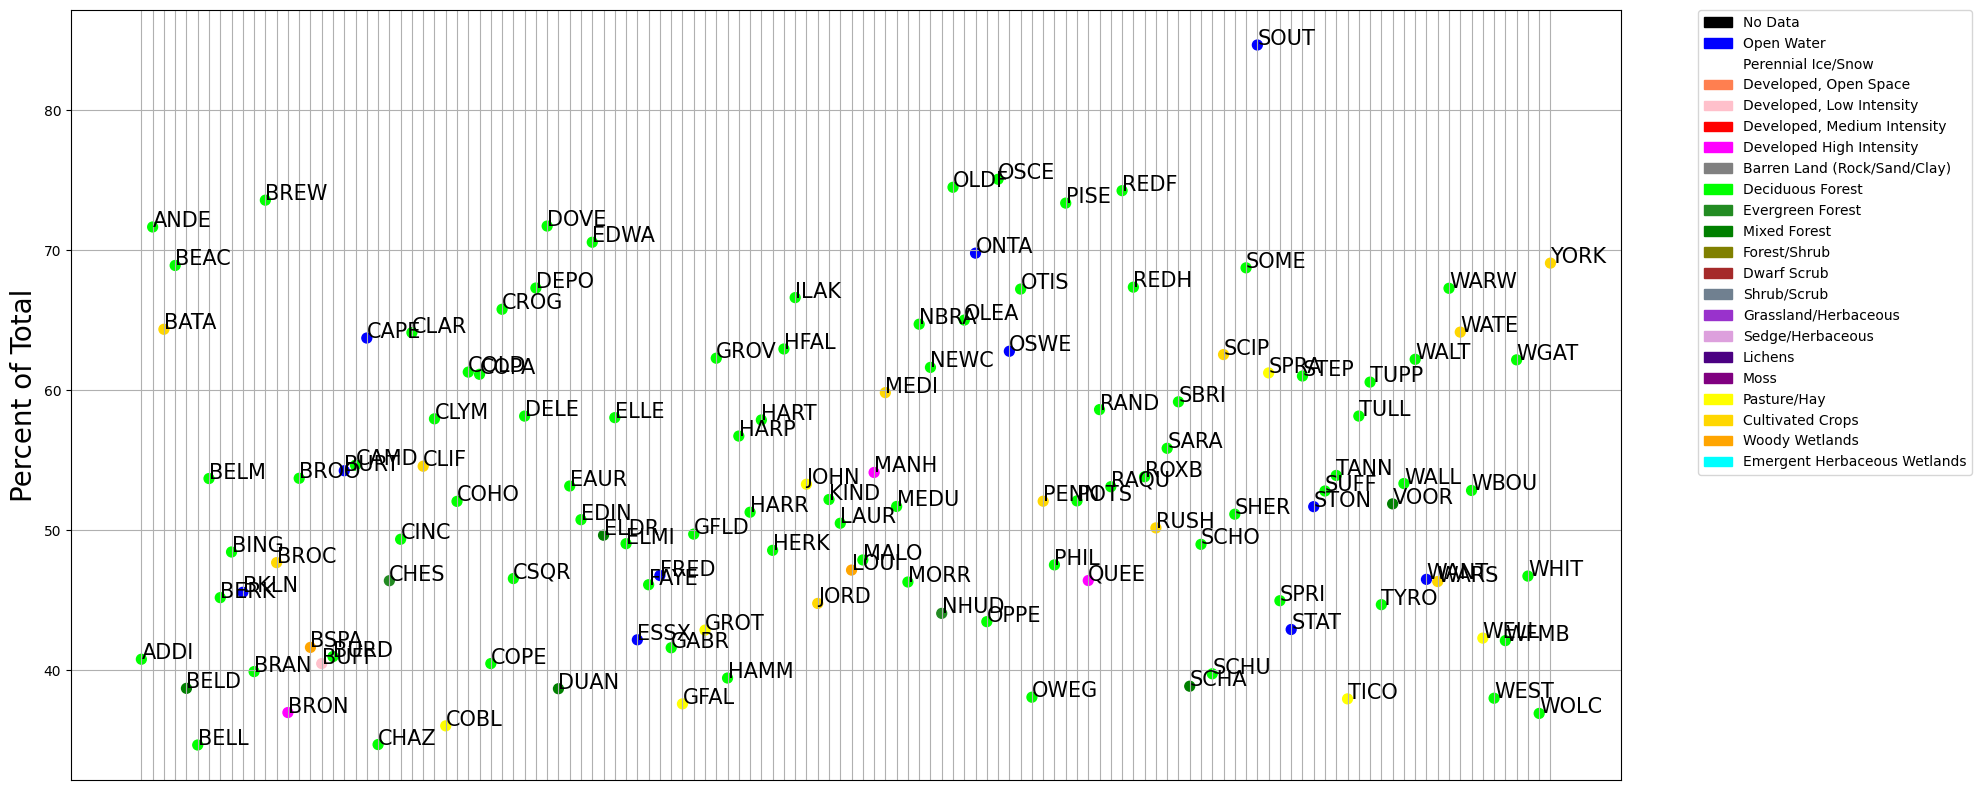

In [52]:
percent_plot(avg_lulc_ny_15_df)

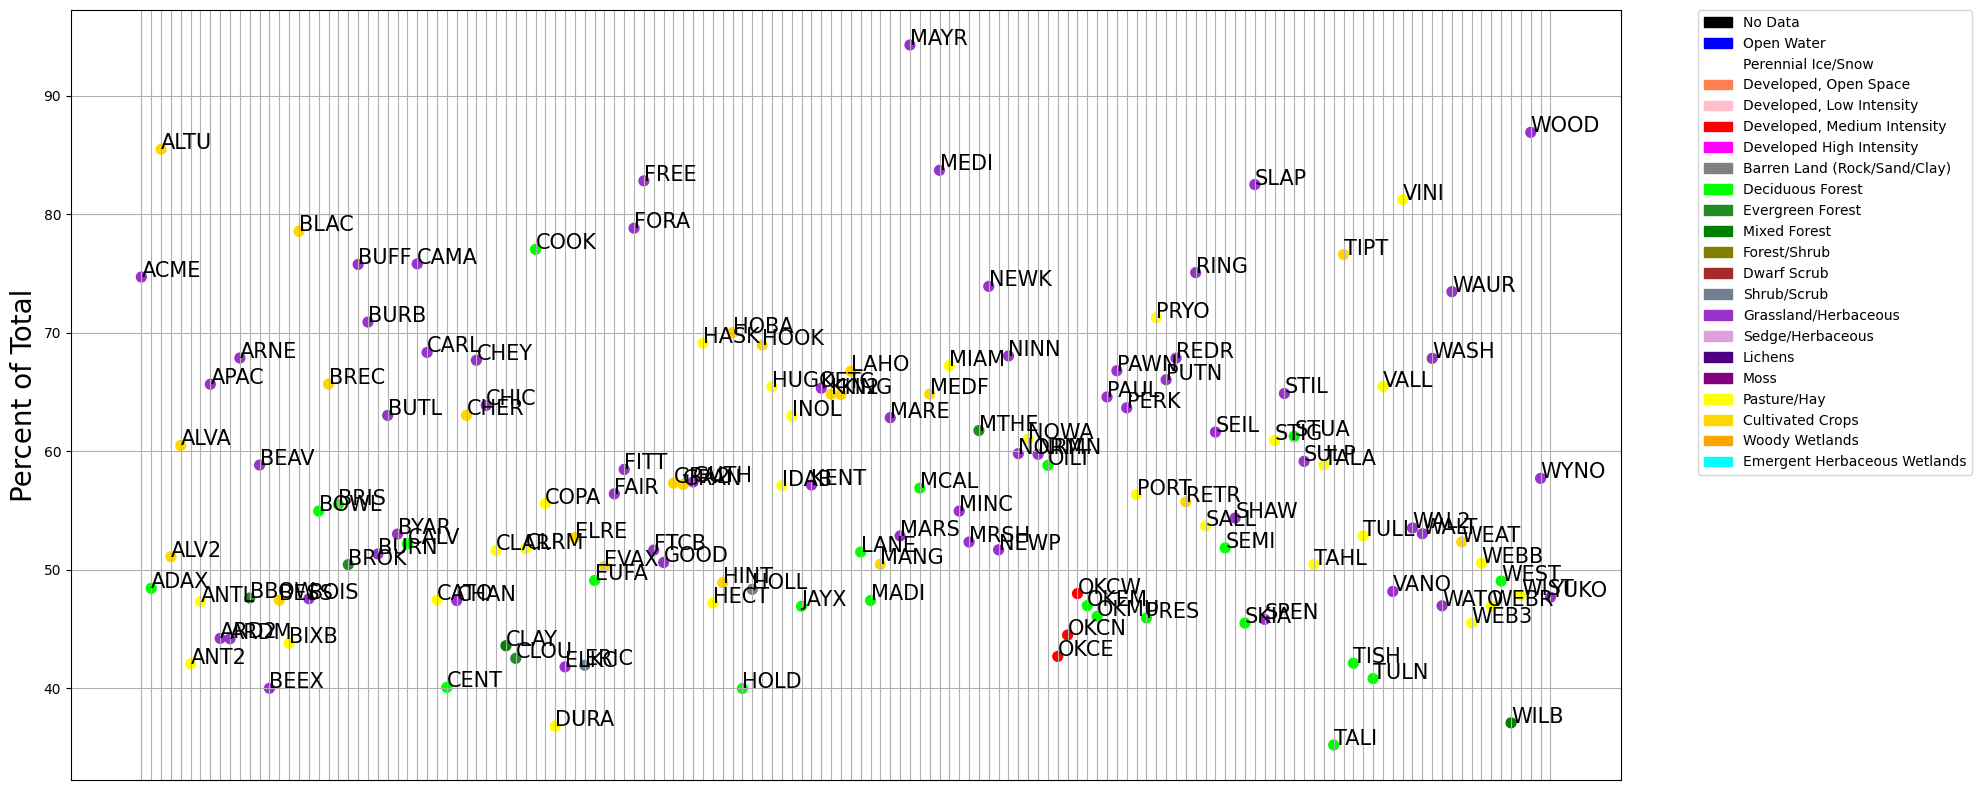

In [53]:
percent_plot(avg_lulc_ok_15_df)

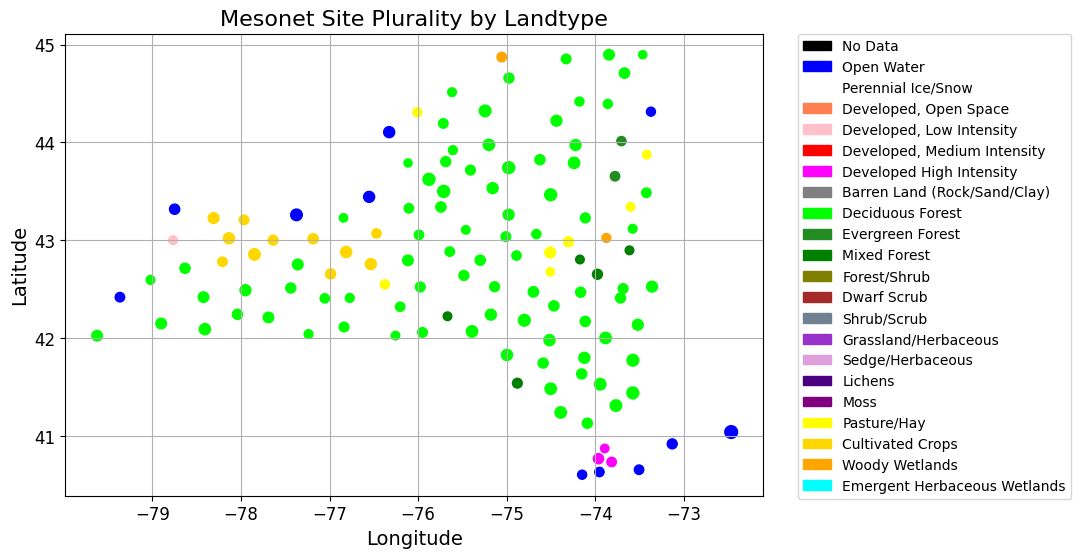

In [46]:
pluarlity_plot(avg_lulc_ny_15_df)